High-Pass Filter with M = 31: T1 = 0.200, T2 = 0.800
Transition Band Indices: ks = 9, kp = 11
Samples in the Transition Band: H_r(ks+1) = 0.2, H_r(ks+2) = 0.8


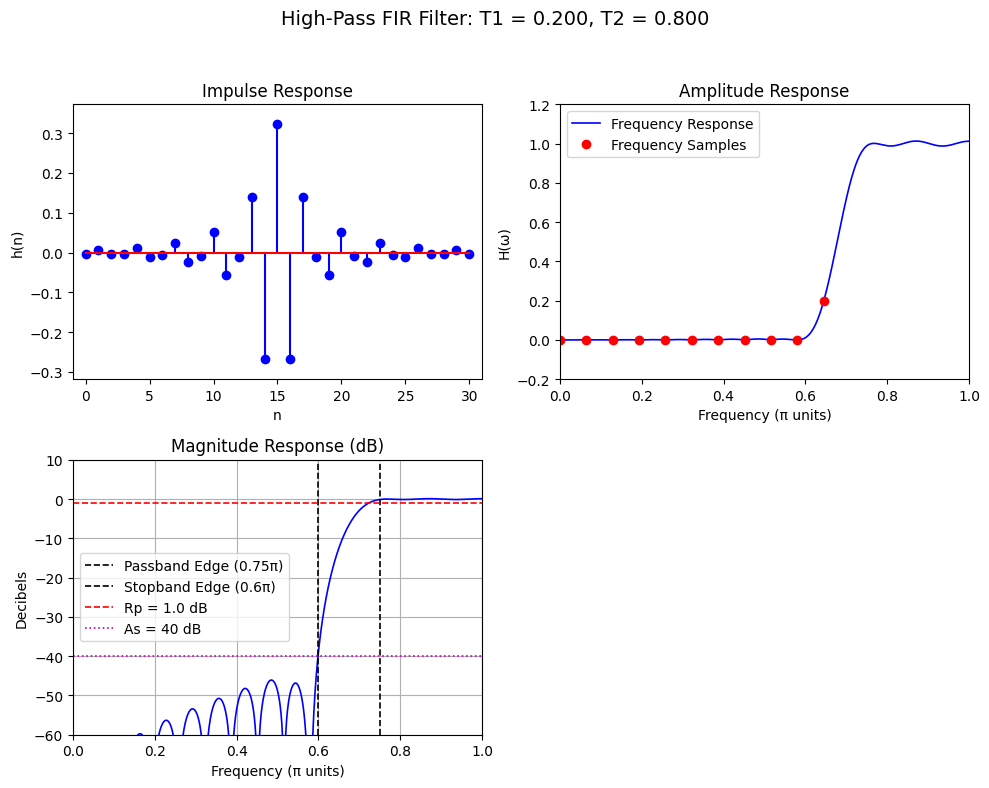

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# High-Pass FIR Filter Design
M = 31                # Filter order (length of filter)
wp = 0.75 * np.pi     # Passband edge frequency
ws = 0.6 * np.pi      # Stopband edge frequency
Rp = 1                # Passband ripple in dB
As_target = 40        # Desired stopband attenuation in dB

# Updated transition band values
T1 = 0.2  # Amplitude value in the first transition sample
T2 = 0.8    # Amplitude value in the second transition sample

alpha = (M - 1) / 2    # Symmetry parameter for frequency sampling
l = np.arange(M)       # Sample indices
wl = (2 * np.pi / M) * l  # Frequency samples in rad/sample

kp = int(np.floor((M * wp) / (2 * np.pi)))  # Passband edge index
ks = int(np.floor((M * ws) / (2 * np.pi)))  # Stopband start index

# Construct the sampled amplitude response H_r(k)
Hrk = np.concatenate([
    np.zeros(ks+1),     # Stopband samples
    [T1, T2],           # Transition band samples
    np.ones(8),         # Passband samples
    [T2, T1],           # Mirrored transition band samples
    np.zeros(ks)        # Stopband samples (mirrored for symmetry)
])

# Validate the length of Hrk
if len(Hrk) != M:
    raise ValueError(f'Hrk must have length {M}')

# Construct the filter's frequency response
k1 = np.arange(0, (M-1)//2 + 1)
k2 = np.arange((M-1)//2 + 1, M)
phase_shift = np.concatenate([
    -alpha * (2 * np.pi) / M * k1, 
    alpha * (2 * np.pi) / M * (M - k2)
])
H = Hrk * np.exp(1j * phase_shift)   # Apply phase shifts to preserve symmetry
h = np.real(np.fft.ifft(H, M))       # Compute impulse response (h[n])

# Compute the filter's frequency response using freqz
w, H_freqz = freqz(h, worN=1024)      # 1024 points for smoother plot
db_response = 20 * np.log10(np.abs(H_freqz) + 1e-10)  # Avoid log(0)
Hr_magnitude = np.abs(H_freqz)

# Display results: Impulse Response and Frequency Response Plots
plt.figure(figsize=(10, 8))
plt.suptitle(f'High-Pass FIR Filter: T1 = {T1:.3f}, T2 = {T2:.3f}', fontsize=14)

# Impulse Response
plt.subplot(2, 2, 1)
plt.stem(l, h, linefmt='b-', markerfmt='bo', basefmt='r-')  # Impulse Response Plot
plt.axis([-1, M, min(h)-0.05, max(h)+0.05])
plt.title('Impulse Response')
plt.xlabel('n')
plt.ylabel('h(n)')

# Amplitude Response
plt.subplot(2, 2, 2)
plt.plot(w / np.pi, Hr_magnitude, 'b-', linewidth=1.2, label='Frequency Response')
plt.plot(wl[:11] / np.pi, Hrk[:11], 'ro', label='Frequency Samples')
plt.axis([0, 1, -0.2, 1.2])
plt.title('Amplitude Response')
plt.xlabel('Frequency (π units)')
plt.ylabel('H(ω)')
plt.legend()

# Magnitude Response in dB
plt.subplot(2, 2, 3)
plt.plot(w / np.pi, db_response, 'b-', linewidth=1.2)
plt.grid(True)
plt.axis([0, 1, -60, 10])
plt.title('Magnitude Response (dB)')
plt.xlabel('Frequency (π units)')
plt.ylabel('Decibels')
plt.axvline(wp / np.pi, color='k', linestyle='--', linewidth=1.2, label='Passband Edge (0.75π)')
plt.axvline(ws / np.pi, color='k', linestyle='--', linewidth=1.2, label='Stopband Edge (0.6π)')
plt.axhline(-Rp, color='r', linestyle='--', linewidth=1.2, label=f'Rp = {Rp:.1f} dB')
plt.axhline(-As_target, color='m', linestyle=':', linewidth=1.2, label=f'As = {As_target} dB')
plt.legend()

# Print key information to the console
print(f"High-Pass Filter with M = {M}: T1 = {T1:.3f}, T2 = {T2:.3f}")
print(f"Transition Band Indices: ks = {ks}, kp = {kp}")
print(f"Samples in the Transition Band: H_r(ks+1) = {T1}, H_r(ks+2) = {T2}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [76]:
# Construct the amplitude response for a high-pass filter
Hrk = np.concatenate([
    np.zeros(ks+1), 
    [T1, T2], 
    np.ones(8), 
    [T2, T1], 
    np.zeros(ks)
])

# Print the sampled amplitude response Hrk
print("Sampled Amplitude Response Hrk:", Hrk)

# Validate length
if len(Hrk) != M:
    raise ValueError(f'Hrk must have length {M}')

Sampled Amplitude Response Hrk: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.8 1.  1.  1.  1.  1.  1.
 1.  1.  0.8 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [77]:
print(f"Transition band indices: ks = {ks}, kp = {kp}")
print("Samples in the transition band:", Hrk[ks:kp+1])


Transition band indices: ks = 9, kp = 11
Samples in the transition band: [0.  0.2 0.8]
